Below we visualize the bivariate Gaussian density for the random vector $(\vec{V}) = [V_1,V_2]^T \sim \mathcal{N}(\vec{\mu},\Sigma)$ with distribution:

$$
f_{\vec{V}}(\vec{v}) = \frac{1}{\sqrt{(2\pi)^2\det{\Sigma}}} e^{\frac{1}{2}(\vec{v}-\vec{\mu})^T\Sigma^{-1}(\vec{v}-\vec{\mu})}
$$

where

$$
\vec{\mu} = 
\begin{bmatrix}
    \mu_{1} \\
    \mu_{2}
\end{bmatrix}
$$

and

$$
\Sigma =
\begin{bmatrix}
    \sigma_{1}^2       & \sigma_{12} \\
    \sigma_{21}       & \sigma_{2}^2 \\
\end{bmatrix} 
=
\begin{bmatrix}
    \operatorname{Var}(V_1)       & \operatorname{Cov}(V_1,V_2) \\
    \operatorname{Cov}(V_1,V_2)       & \operatorname{Var}(V_2) \\
\end{bmatrix}
$$

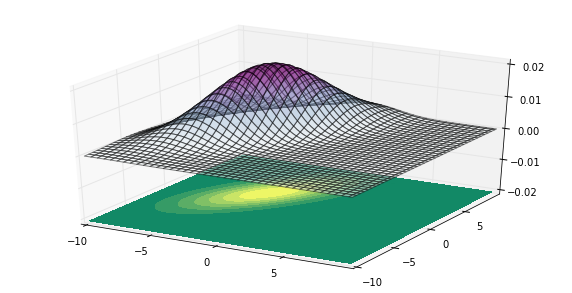

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, FloatSlider
import ipywidgets as widgets
from scipy.stats import multivariate_normal
%matplotlib inline

def plot_2dgauss(mu1,mu2,sig11,sig12,sig22):

    if(sig12 > sig11 and sig12 > sig22):
        sig12 = min(sig11,sig22)-0.1

    x, y = np.mgrid[-10:10:.25, -10:10:.25]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal([mu1, mu2], [[sig11, sig12], [sig12, sig22]])

    fig = plt.figure(figsize=(10,5))
    ax = fig.gca(projection='3d')         # set the 3d axes
    z = rv.pdf(pos)
    zmax = np.max(z)
    ax.plot_surface(x, y, z, 
                    rstride=2, 
                    cstride=2, 
                    alpha=0.5,
                    cmap=cm.BuPu)         # colour map

    cset = ax.contourf(x, y, z, 
                       zdir='z',          # direction to project the contour
                       offset=-zmax,        # how "far" render the contour map
                       cmap=cm.summer)    # winter colour map
    ax.set_zlim([-zmax,zmax])

    
interact(plot_2dgauss, 
        mu1=FloatSlider(min=-5, max=5, step=0.25,continuous_update=False),
        mu2=FloatSlider(min=-5, max=5, step=0.25,continuous_update=False),
        sig11=FloatSlider(min=1, max=15, step=0.25,continuous_update=False),
        sig22=FloatSlider(min=1, max=15, step=0.25,continuous_update=False),
        sig12=FloatSlider(min=0, max=15, step=0.25,continuous_update=False));